In [1]:
import tf_keras_vis
print(tf_keras_vis.__version__)

0.8.0


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from matplotlib import pyplot as plt
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.activation_maximization.callbacks import Progress
from tf_keras_vis.activation_maximization.callbacks import GifGenerator2D
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D
from tf_keras_vis.activation_maximization.regularizers import TotalVariation2D, Norm
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tensorflow import keras
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))
print(physical_devices)
with tf.device('GPU:0'):
    model = keras.models.load_model('saved-model/keras-vgg')
    model.summary()

Num GPUs: 0
[]


/home/dtyoung/.conda/envs/ml/lib/python3.7/site-packages/keras/layers/core/lambda_layer.py:338: UserWarning: onnx2keras.reshape_layers is not loaded, but a Lambda layer uses it. It may cause errors.
  'It may cause errors.'.format(module), UserWarning)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_0 (InputLayer)         [(None, 24, 256, 1)]      0         
_________________________________________________________________
17 (Conv2D)                  (None, 22, 254, 100)      1000      
_________________________________________________________________
18 (Activation)              (None, 22, 254, 100)      0         
_________________________________________________________________
19 (MaxPooling2D)            (None, 11, 127, 100)      0         
_________________________________________________________________
20 (Conv2D)                  (None, 9, 125, 100)       90100     
_________________________________________________________________
21 (Activation)              (None, 9, 125, 100)       0         
_________________________________________________________________
22 (MaxPooling2D)            (None, 4, 62, 100)        0   

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy
from scipy import io
def plot_single_EEG(data, num_chan):
    fig,inner = plt.subplots(num_chan,1)
    for j in range(num_chan):
        ax = inner[j]
        
        ax.plot(range(256),data[j,:],'k')
        if j < num_chan-1:
            ax.axis('off')
            ax.set_xticks([])
        else:
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
        ax.set_yticks([])
        fig.add_subplot(ax)

Visualizing filter 0
400/400 [==============================] - 15s 37ms/step - Score: 1.0285 - TotalVariation2D: 8.7470 - Norm: 16.7792
Visualizing filter 1
400/400 [==============================] - 15s 37ms/step - Score: 1.4487 - TotalVariation2D: 8.0461 - Norm: 17.9793
Visualizing filter 0
400/400 [==============================] - 15s 37ms/step - Score: 0.7523 - TotalVariation2D: 8.9458 - Norm: 16.5377
Visualizing filter 1
400/400 [==============================] - 15s 37ms/step - Score: 1.4255 - TotalVariation2D: 8.0863 - Norm: 17.7635
Visualizing filter 0
400/400 [==============================] - 15s 38ms/step - Score: 0.8763 - TotalVariation2D: 8.9906 - Norm: 17.0611
Visualizing filter 1
400/400 [==============================] - 15s 38ms/step - Score: 1.4377 - TotalVariation2D: 8.0250 - Norm: 18.4507
Visualizing filter 0
400/400 [==============================] - 15s 38ms/step - Score: 0.7831 - TotalVariation2D: 8.9487 - Norm: 16.4057
Visualizing filter 1
400/400 [===========

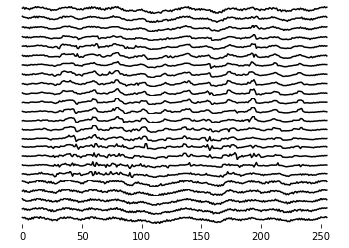

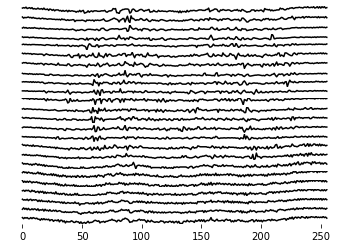

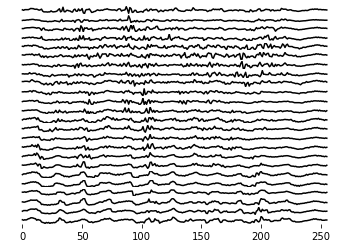

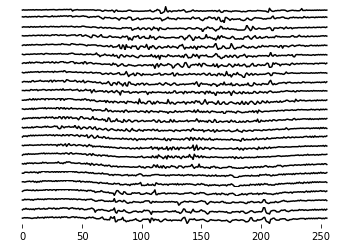

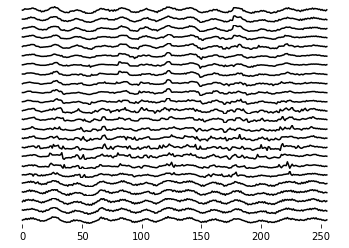

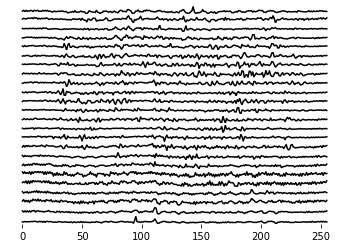

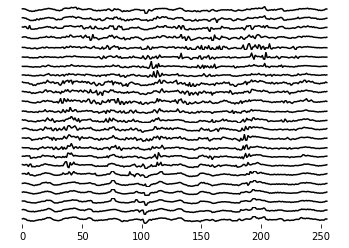

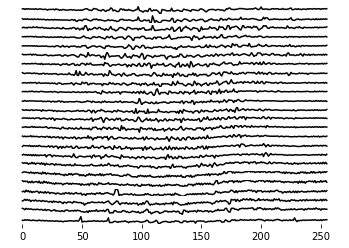

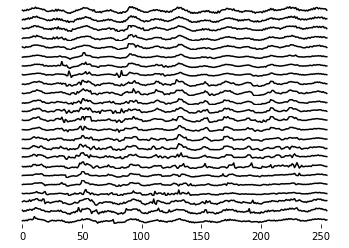

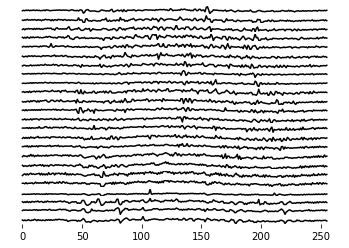

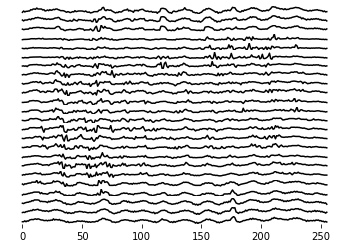

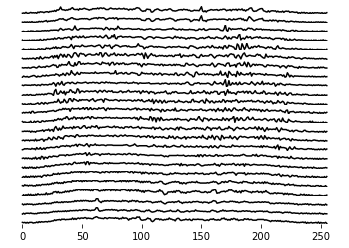

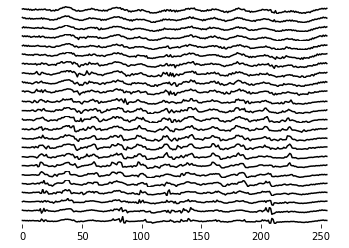

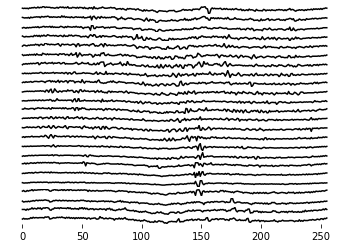

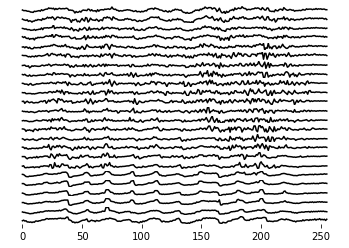

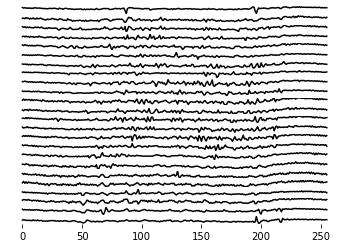

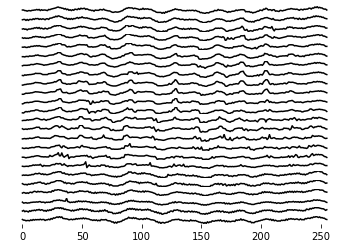

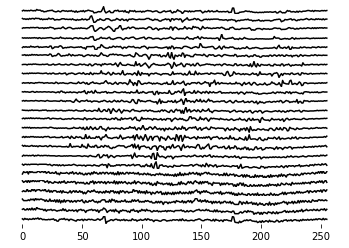

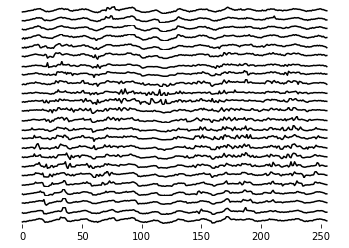

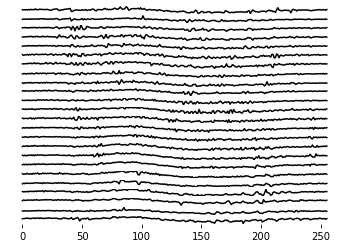

In [8]:
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
import numpy as np
from tf_keras_vis.activation_maximization.callbacks import Progress

path = "/expanse/projects/nemar/dtyoung/childmind-visualization/AM-results-no-input-range"
if not os.path.isdir(f"{path}"):
    os.mkdir(f"{path}")
layers = ['output_0']#['17','20', '23', '26', '29', '31']#, 'output_0'] # The target layer that is the last layer of VGG16.
layers_interpretable = ['fc']#['conv1','conv2','conv3','conv4', 'conv5','conv6']#,'fc']
for l in range(len(layers)):
    layer_name = layers[l]
    if not os.path.isdir(f"{path}/{layers_interpretable[l]}"):
        os.mkdir(f"{path}/{layers_interpretable[l]}")
    # This instance constructs new model whose output is replaced to `block5_conv3` layer's output.
    extract_intermediate_layer = ExtractIntermediateLayer(index_or_name=layer_name)
    # This instance modify the model's last activation function to linear one.
    replace2linear = ReplaceToLinear()
    filter_numbers = [0,1]#list(range(67,100))
    for exp in range(10,20):
        for filter_number in filter_numbers:
            print(f"Visualizing filter {filter_number}")
            score = CategoricalScore(filter_number) # score here is interepreted as activation for the filter?
            # Generate maximized activation
            # Create the visualization instance.
            # All visualization classes accept a model and model-modifier, which, for example,
            #     replaces the activation of last layer to linear function so on, in constructor.
            activation_maximization = \
               ActivationMaximization(model,model_modifier=[extract_intermediate_layer, replace2linear],
                                      clone=False)
            activations = activation_maximization(score,input_modifiers = [Jitter(jitter=4)], 
                                                  callbacks=[Progress()], steps=400)
            plot_single_EEG(np.squeeze(activations[0]),24)
            filename = f"{path}/{layers_interpretable[l]}/{layers_interpretable[l]}-filter{filter_number}-exp{exp}"
            io.savemat(f"{filename}.mat", {"output":np.squeeze(activations[0])})
            plt.savefig(f"{filename}.jpg")

        #     np.save(f"visualization/filter{filter_number}",activations[0])
        #     input("Press Enter to continue...")




In [6]:
activations.shape

(1, 24, 256, 1)

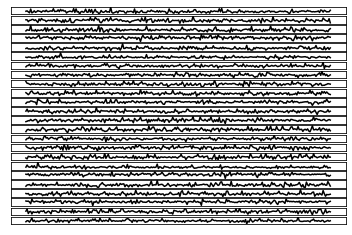

In [104]:
plot_single_EEG(np.squeeze(activations[0]),24)